<a href="https://colab.research.google.com/github/hakidaova/MLF/blob/main/MLF_cv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load IRIS dataset, check its contents:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[:,:])
print(iris.target) #iris type (only 3 types: 0, 1, 2)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [4]:
# Split data into training and testing parts:
from sklearn.model_selection import train_test_split
X=iris.data #store all iris data into X
y=iris.target #store iris types in order of data into y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1) # split X and Y into a fraction and take test_size of data for testing, the rest for training
print(X.shape) # returns number of rows and collumns (150 samples, 4 features)
print(X_train.shape) #training data
print(X_test.shape) #testing data
print(y_train.shape)
print(y_test.shape)

(150, 4)
(135, 4)
(15, 4)
(135,)
(15,)


In [29]:
# Use a Support Vector Machine for classification:
# (training and testing the classifier)
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear') # Kernel transforms data into a higher-dimensional space, simple linear separation between classes
SVMmodel.fit(X_train,y_train) # finding optimal boundaty do separate classes in (input data for training, target output for training)
SVMmodel.get_params()
#print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test) # prints fraction value of correctly classified samples in the test set

1.0

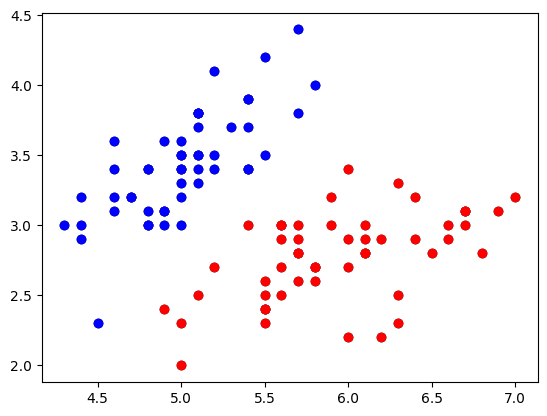

In [18]:
# Let's explore more now.
# Choose only first two features (columns) of iris.data
# SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data
X = iris.data[:,0:2] # choose only first two features
X_filtered = X[iris.target != 2] # keep only samples where target is not 2
y_filtered = y[iris.target != 2] # Keep only samples where target is not 2
import matplotlib.pyplot as plt
plt.scatter(X_filtered[:,0],X_filtered[:,1], color='black') # plots remaining data
plt.scatter(X_filtered[y_filtered==0,0],X_filtered[y_filtered==0,1], color='blue') # y==0  1st iris type
plt.scatter(X_filtered[y_filtered==1,0],X_filtered[y_filtered==1,1], color='red') # y==1  2nd iris type
# plt.scatter(X[y==2,0],X[y==2,1], color='cyan') #don't take this for SVM in its basic form
# filtered step isnt necessary if the approach mentioned on 1 line above this comment is used

In [79]:
# Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_filtered,y_filtered,test_size=0.1)
SVMmodel_1=SVC(kernel='linear', C=1) #default is 1
SVMmodel_1.fit(X_train_1,y_train_1)
SVMmodel_1.get_params()
SVMmodel_1.score(X_test_1,y_test_1)

1.0

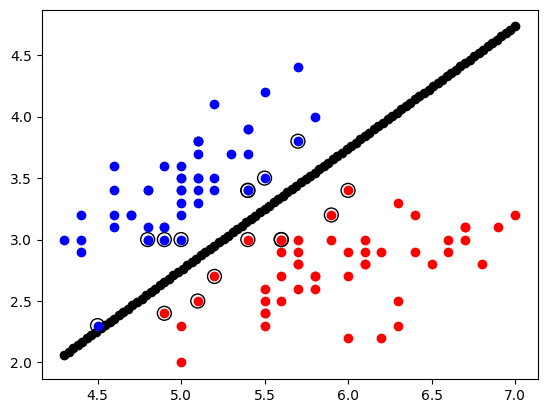

In [102]:
# Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

supvectors=SVMmodel_1.support_vectors_
# print(supvectors)
# Plot the support vectors here
plt.scatter(supvectors[:,0], supvectors[:,1], s=100, facecolors='none', edgecolors='black') # s is radius of the points

#Separating line coefficients:
W=SVMmodel_1.coef_ # weights (w0, w1): tilts the slope
b=SVMmodel_1.intercept_ # bias term

import numpy as np

x0 = np.linspace(np.min(X_filtered[:,0]),np.max(X_filtered[:,0]),100)
x1 = -b/W[0,1]-W[0,0]/W[0,1]*x0 # from the equation for line
plt.scatter(x0, x1, color = 'black')
plt.scatter(X_filtered[y_filtered==0,0],X_filtered[y_filtered==0,1], color='blue')
plt.scatter(X_filtered[y_filtered==1,0],X_filtered[y_filtered==1,1], color='red')



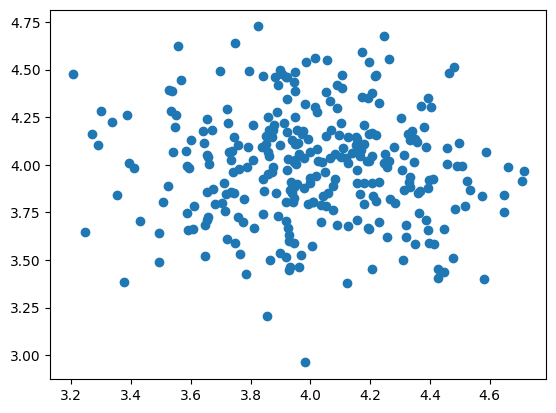

In [104]:
#Anomaly detection via SVM
#Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4)) #input data

plt.scatter(x[:,0], x[:,1])
plt.show()

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


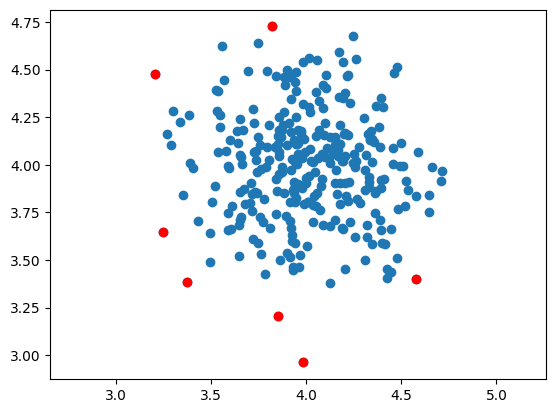

In [108]:
#Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
# Radial Basis Function (RBF) kernel is used to map the data to a higher-dimensional space for non-linear separation
# gamma defines how far the influence of a single training point reaches, smaller value means a wider influence
# nu is an upper bound on the fraction of margin errors (outliers) and a lower bound on the fraction of support vectors, small nu means fewer outliers expected
SVMmodelOne.fit(x) # training
pred = SVMmodelOne.predict(x) # predicts if data fits or is outlying
print(pred)
anom_index = where(pred==-1) # indexes of the values that are out of range for the class
anom = x[anom_index] # stores anomaly datas to "anom"

plt.scatter(x[:,0], x[:,1]) #all data
plt.scatter(anom[:,0], anom[:,1], color='red') #anomalies
plt.axis('equal')
plt.show()

8.989098620408397


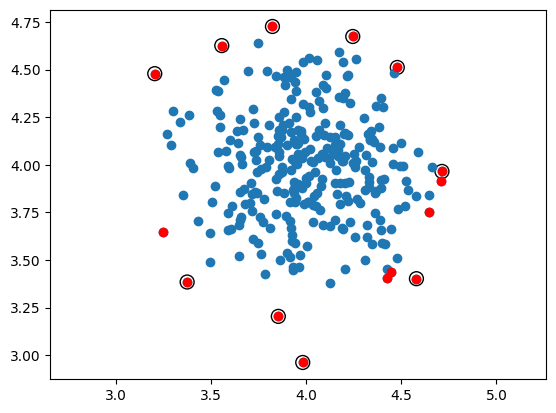

In [114]:
# Plot the support vectors:
suppvec=SVMmodelOne.support_vectors_
plt.scatter(suppvec[:,0], suppvec[:,1], s=100, facecolors='none', edgecolors='black') # s is radius of the points

#What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05) # % quantile: a percentage (in fraction form) of the data that is most far away from the average
print(thresh)
index = where(scores<=thresh) # finding data that has score lower than the threshold
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()